#### Academic success
#### Krunal Dave
#### Date: 08/06/2024
#### (3)

In [1]:
# Import necessary libraries
import numpy as np
import sklearn
import matplotlib as mlt
import seaborn as sns
import pandas as pd


In [2]:
# read the data
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
id=df2["id"]

Data exploration and preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
df["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [6]:
# the target variable is categorical variavle here
# for mathematical operation, converting it in to numerical one
#by replacing graduate=1 , dropout=2, enrolled=3

replacement_dict = {"Graduate": 1, "Dropout": 2, "Enrolled": 3}
df['Target'] = df['Target'].replace(replacement_dict)

In [7]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,1
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,2
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,2
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,3
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,1


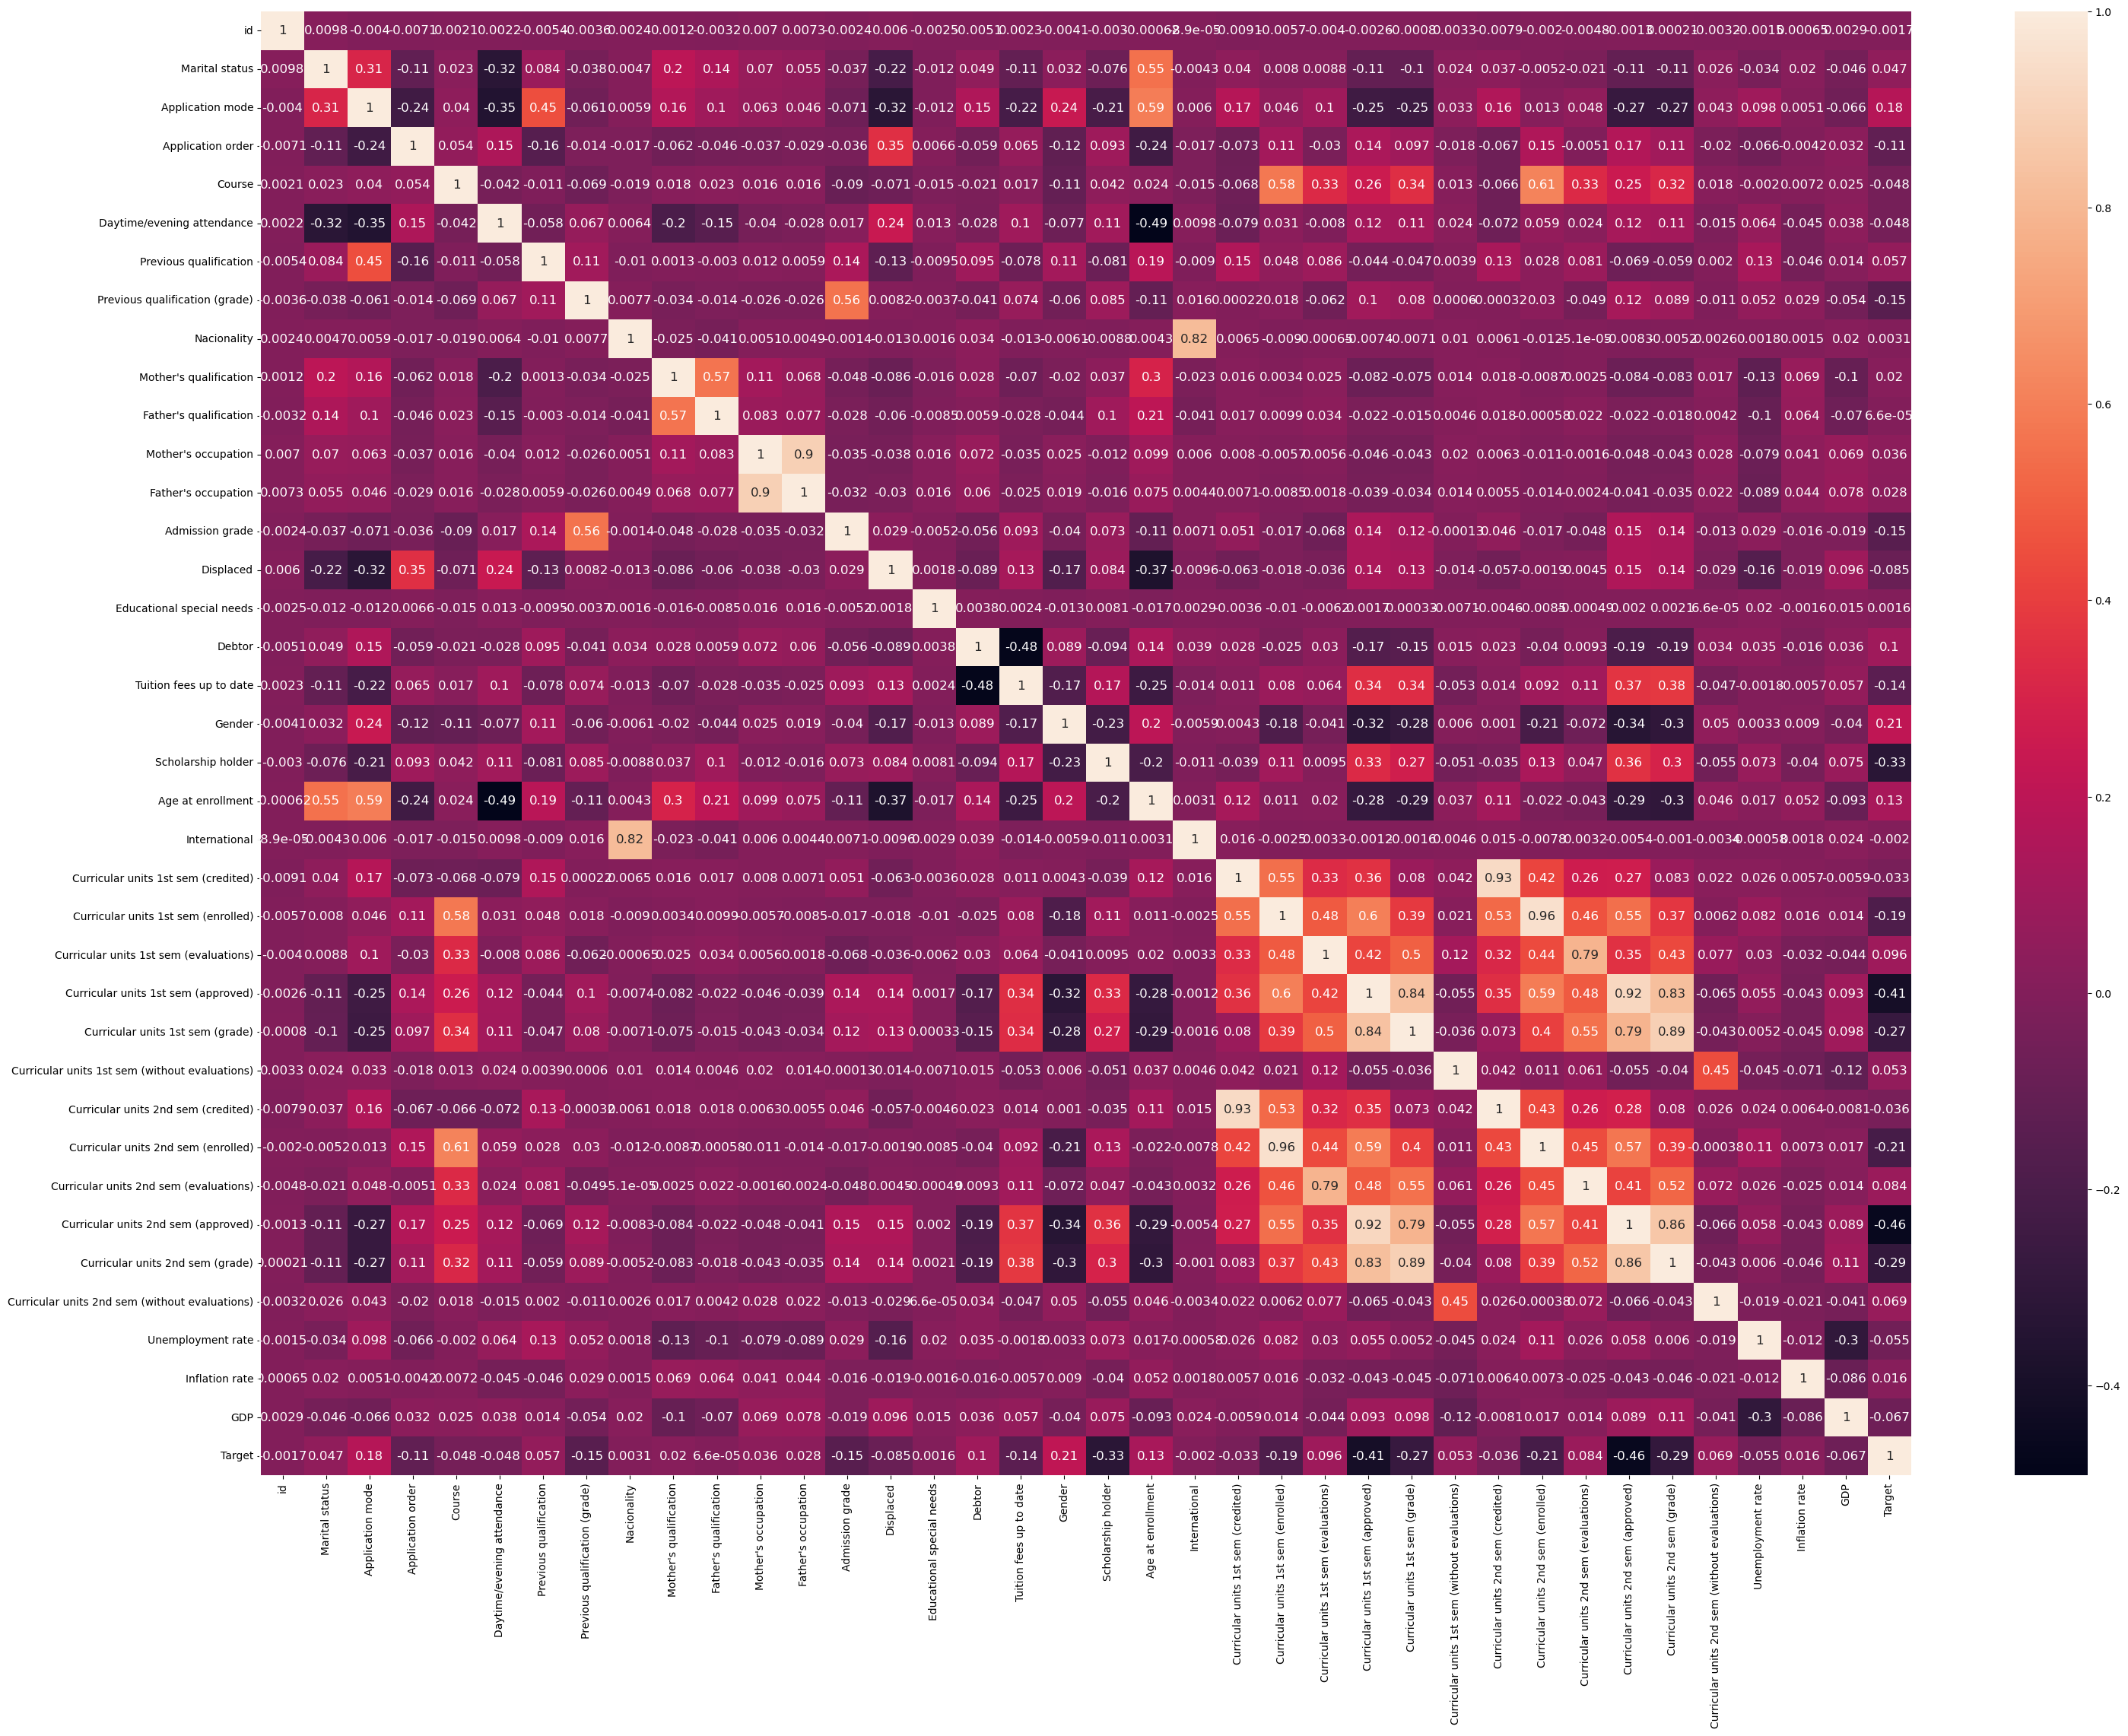

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(35,25))

sns.heatmap(df.corr(),annot=True,annot_kws={"size":12})
plt.ion()


In [9]:
# Based on the correlation, lets drop features
col=["Father's qualification","id","Nacionality"]
df=df.drop(columns=col,axis=1)
df2=df2.drop(columns=col,axis=1)


In [10]:
# split the data into X and y
y=df["Target"]
X=df.drop("Target",axis=1)

In [11]:
# now saclling the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)
df3=scalar.fit_transform(df2)

In [12]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


Model selection and training

In [13]:
# 1) Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rf=RandomForestClassifier(n_estimators=180,random_state=43)
model_rf.fit(X_train,y_train)

pred_rf=model_rf.predict(X_test)
print(accuracy_score(pred_rf,y_test))


0.8264506011500261


In [14]:
#2) Logistic regression classifier

from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)

pred_lr=model_lr.predict(X_test)
print(accuracy_score(pred_lr,y_test))


0.8148849973863043


In [15]:
# 3) support vector machines
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

pred_svm=model_svm.predict(X_test)
print(accuracy_score(pred_svm,y_test))

0.8182174594877156


In [16]:
#4) naive bayes
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(X_train,y_train)

pred_nb=model_nb.predict(X_test)
print(accuracy_score(pred_nb,y_test))

0.7613695765812859


In [17]:
#5) gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

model_gb=GradientBoostingClassifier(learning_rate=1,n_estimators=170,max_depth=3)
model_gb.fit(X_train,y_train)

pred_gb=model_gb.predict(X_test)
print(accuracy_score(pred_gb,y_test))

0.8250784108729744


From the above models, it is clear that the Random forest classifier has the best accuracy,
so, train the model with full data

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=180)
model_RF.fit(X,y)

finle_pred=model_RF.predict(df3)

submission=pd.DataFrame({"id":id,
                         "Target":finle_pred})

In [19]:
replacement_dict2 = {1:"Graduate",2: "Dropout",3: "Enrolled"}
submission=submission["Target"].replace(replacement_dict2)

In [21]:
submission.to_csv("academic_success_RF.csv",index=False)